In [1]:
import torch 
from torch import nn

import torchvision 
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

In [2]:
# dataset 
train_data = datasets.FashionMNIST(
    root = "data",
    train=True,
    download=True,
    transform= ToTensor(),
    target_transform=None
) 
test_data = datasets.FashionMNIST(
    root = "data",
    train=False,
    download=True,
    transform= ToTensor(),
    target_transform=None
) 

In [3]:
len(train_data) , len(test_data)

(60000, 10000)

In [4]:
image , label = test_data[0]
image , label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [5]:
class_name = train_data.classes
class_name

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
image.shape , label

(torch.Size([1, 28, 28]), 9)

image shape : torch.Size([1, 28, 28])


(-0.5, 27.5, 27.5, -0.5)

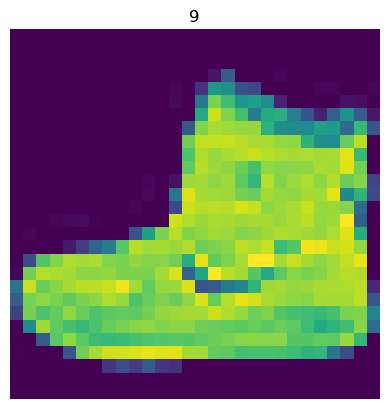

In [8]:
image , label = train_data[0]
print(f"image shape : {image.shape}")
plt.imshow(image.squeeze())
plt.title(label)
plt.axis(False)

(-0.5, 27.5, 27.5, -0.5)

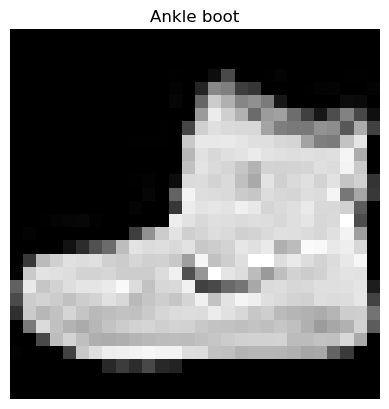

In [9]:
plt.imshow(image.squeeze() , cmap="gray")
plt.title(class_name[label]);
plt.axis(False)

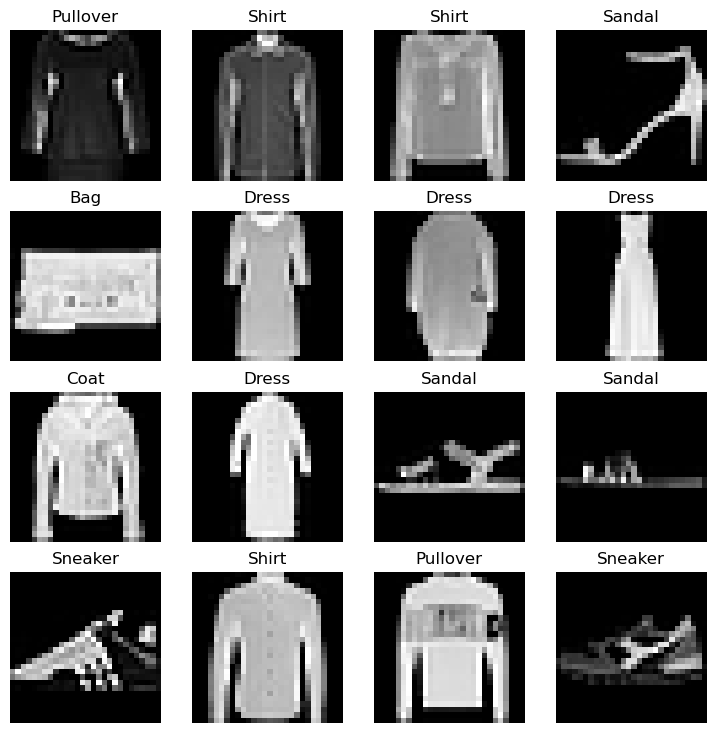

In [10]:
torch.manual_seed = 42 
fig = plt.figure(figsize= (9 ,9))
rows , cols = 4 , 4 
for i in range (1 , rows*cols+1):
    random_idx = torch.randint(0 , len(train_data) , size=[1]).item()
    image , label = train_data[random_idx]
    fig.add_subplot(rows,cols,i)
    plt.imshow(image.squeeze(), cmap="gray")
    plt.axis(False)
    plt.title(class_name[label])

In [11]:
#prepare dataloader 
from torch.utils.data import DataLoader

# batch size 
BATCH_SIZE = 32
# BATCHES 
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

print(f"dataloaders : { train_dataloader , test_dataloader }")
print(f"length of train_dataloader : {len(train_dataloader)} batches of {BATCH_SIZE} ...")
print(f"length of test_dataloader : {len(test_dataloader)} batches of {BATCH_SIZE} ...")

dataloaders : (<torch.utils.data.dataloader.DataLoader object at 0x00000241102280B0>, <torch.utils.data.dataloader.DataLoader object at 0x000002411014F200>)
length of train_dataloader : 1875 batches of 32 ...
length of test_dataloader : 313 batches of 32 ...


In [12]:
train_features_batch , train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape , train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

image size : torch.Size([1, 28, 28])
label : 3 , label size : torch.Size([])


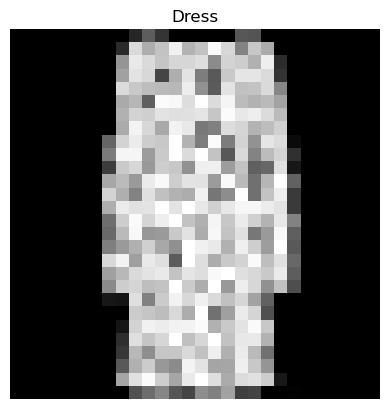

In [13]:
#show a sample 
torch.manual_seed = 42 
random_idx = torch.randint(0,len(train_features_batch) , size=[1]).item()
image , label = train_features_batch[random_idx] , train_labels_batch[random_idx]
plt.imshow(image.squeeze(),cmap="gray")
plt.title(class_name[label])
plt.axis(False)
print(f"image size : {image.shape}")
print(f"label : {label} , label size : {label.shape}")


In [14]:
# model 0 : build a basline model
# flatten model 
flatten_model = nn.Flatten()
# get a simple sample 
x= train_features_batch[0]
#flatten the sample 
output = flatten_model(x)
#print 
print(f"shape before flatten : {x.shape} --> color channel , hight , width")
print(f"shape after flatten : {output.shape}--> color channel , hight*width")

shape before flatten : torch.Size([1, 28, 28]) --> color channel , hight , width
shape after flatten : torch.Size([1, 784])--> color channel , hight*width


In [15]:
class fashion(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hiddent_units: int,
                 output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape , out_features= hiddent_units),
            nn.Linear(in_features=hiddent_units , out_features= output_shape)
        )

    def forward (self , x):
        return self.layer_stack(x)
        

In [16]:
torch.manual_seed = 42 
model_0 = fashion(input_shape=784 , 
                  hiddent_units= 10,
                  output_shape=len(class_name)
).to("cpu")
model_0

fashion(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [17]:
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[-0.0872,  0.1167,  0.2472, -0.3240, -0.1202,  0.2155,  0.0548, -0.2136,
          0.1358, -0.0552]], grad_fn=<AddmmBackward0>)

In [18]:
# setup loss , optimizer 
import requests
from pathlib import Path

# download helper function from pytorch repo
if Path("helper_functions.py").is_file():
    print("downloaded")
else:
    print("downloading the shit ...")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
    with open("helper_functions.py" , "wb") as f : 
        f.write(request.content)


downloaded


In [19]:
# import accuracy metric 
from helper_functions import accuracy_fn
# setup lost function and optimizer 
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params= model_0.parameters() ,
                             lr=0.1)

In [20]:
# time our experiments
from timeit import default_timer as timer 
def print_time(start:float,
               end:float,
               device: torch.device = None):
    total_time = end - start
    print(f"train time on {device} : {total_time:.3f} seconds")
    return total_time

In [21]:
start_time = timer()
end_time = timer()
print_time(start= start_time ,end = end_time , device="cpu")

train time on cpu : 0.000 seconds


3.509999987727497e-05

1. loop through epoches 
2. loop through training batches 
3. loop through testing batches 
4. ptint whats happening 
5. time it all !

In [22]:
#import tqdm for prograss bar 
from tqdm.auto import tqdm
# set timer 
torch.manual_seed = 42
train_time_starter_on_cpu = timer()
# epoches 
epoches = 3
# create training loop 
for epoch in tqdm(range(epoches)):
    print(f"epoch : {epoch} \n---------")
    ### training 
    train_loss = 0 
    # add a loop to loop training batches 
    for batch , (x,y) in enumerate(train_dataloader):
        model_0.train()
        #forward pass 
        y_pred = model_0(x)
        #loss
        loss = loss_fn(y_pred,y)
        train_loss += loss
        #optimizer 
        optimizer.zero_grad()
        #loss backward 
        loss.backward()
        # optimizer step 
        optimizer.step()

        # print out whats happeining 
        if batch % 400 ==0:
            print(f"looked at {batch*len(x)}/{len(train_dataloader.dataset)} samples.")

# divide totall train loss by length of train dataloader
    train_loss/=len(train_dataloader)
### testing 
    test_loss , test_acc = 0 , 0 
    model_0.eval()
    with torch.inference_mode():
        for x_test,y_test in test_dataloader:
            # forward pass
            test_pred = model_0(x_test)
            # loss 
            test_loss += loss_fn(test_pred , y_test)
            #accuracy 
            test_acc += accuracy_fn(y_true=y_test , y_pred=test_pred.argmax(dim=1))

        # calculate test loss average 
        test_loss /= len(test_dataloader)
        # calculate test acc average 
        test_acc /= len(test_dataloader)

    print(f"\n Train Loss : {train_loss:.4f} | test_loss : {train_loss:.4f} | test_acc : {test_acc:.4f}")

# calculate training time 
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_time(start=train_time_starter_on_cpu,
                                      end=train_time_end_on_cpu,
                                      device= str(next(model_0.parameters()).device)
                                      )




  0%|          | 0/3 [00:00<?, ?it/s]

epoch : 0 
---------
looked at 0/60000 samples.
looked at 12800/60000 samples.
looked at 25600/60000 samples.
looked at 38400/60000 samples.
looked at 51200/60000 samples.

 Train Loss : 0.5886 | test_loss : 0.5886 | test_acc : 81.6993
epoch : 1 
---------
looked at 0/60000 samples.
looked at 12800/60000 samples.
looked at 25600/60000 samples.
looked at 38400/60000 samples.
looked at 51200/60000 samples.

 Train Loss : 0.4782 | test_loss : 0.4782 | test_acc : 81.0803
epoch : 2 
---------
looked at 0/60000 samples.
looked at 12800/60000 samples.
looked at 25600/60000 samples.
looked at 38400/60000 samples.
looked at 51200/60000 samples.

 Train Loss : 0.4563 | test_loss : 0.4563 | test_acc : 82.0088
train time on cpu : 48.881 seconds


### make predictions and get model_0 results 

In [23]:
#setup device-agnostic code 
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [45]:
import torch.utils
import torch.utils.data


torch.manual_seed = 42
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn : torch.nn.Module,
               accuracy_fn):
    loss , acc = 0 ,0
    model.eval()
    with torch.inference_mode():
        for x , y in tqdm(data_loader):
            x , y = x.to(device) , y.to(device)
            y_pred = model(x)
            loss += loss_fn(y_pred,y)
            acc += accuracy_fn(y_true=y,
                               y_pred=y_pred.argmax(dim=1))
            
        #scale loss and acc 
        loss/=len(data_loader)
        acc/=len(data_loader)
    
    return {"model_name" : model.__class__.__name__ ,
            "model_loss" : loss.item(),
            "model_acc"  : acc}



In [27]:

# calculate model_0 results test dataset
model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)

model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'fashion',
 'model_loss': 0.490775465965271,
 'model_acc': 82.00878594249201}

In [28]:
!nvidia-smi

Thu Oct 10 16:33:50 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 555.94                 Driver Version: 555.94         CUDA Version: 12.5     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4070 ...  WDDM  |   00000000:01:00.0  On |                  N/A |
| N/A   41C    P8              4W /   45W |     708MiB /   8188MiB |      5%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [29]:
torch.cuda.is_available()

True

In [30]:
#setup device-agnostic code 
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

### Build with non-linearity 

In [31]:
class fashionV1(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape , out_features= hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units , out_features= output_shape),
            nn.ReLU()
        )

    def forward (self , x: torch.Tensor):
        return self.layer_stack(x)

In [32]:
# run on GPU
torch.manual_seed=42
model_1 = fashionV1(input_shape=784,
                    hidden_units=10,
                    output_shape=len(class_name)).to(device)

next(model_1.parameters()).device

device(type='cuda', index=0)

In [33]:
# import accuracy metric 
from helper_functions import accuracy_fn
# setup lost function and optimizer 
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params= model_0.parameters() ,
                             lr=0.1)

### functionizing our training and testing loop 

In [34]:
def train_step(model:torch.nn.Module,
               data_loader : torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer:torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    
    train_loss , train_acc = 0 , 0

    model.train()
    # add a loop to loop training batches 
    for batch , (x,y) in enumerate(data_loader):
        x , y = x.to(device) , y.to(device)
        #forward pass 
        y_pred = model(x)
        #loss
        loss = loss_fn(y_pred,y)
        train_loss += loss
        #acc
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1))

        #optimizer 
        optimizer.zero_grad()
        #loss backward 
        loss.backward()
        # optimizer step 
        optimizer.step()

    # divide totall train loss by length of train dataloader
    train_loss/=len(data_loader)
    train_acc/=len(data_loader)
    # print out whats happeining 
    print(f"train_loss : {train_loss:.5f} | train_acc : {train_acc:.2f}%")

In [35]:
def test_step(model:torch.nn.Module,
               data_loader : torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):
    test_loss , test_acc = 0,0

    model.eval()
    with torch.inference_mode():
        for x , y in (data_loader):
            x , y = x.to(device) , y.to(device)

            test_pred = model(x)
            test_loss += loss_fn(test_pred,y)
            test_acc += accuracy_fn(y_true=y,
                               y_pred=test_pred.argmax(dim=1))
        
        #adjust metrics and print out
        #scale loss and acc 
        test_loss/=len(data_loader)
        test_acc/=len(data_loader)
        print(f"test loss: {test_loss:.5f} | test_acc : {test_acc:.2f}% \n")


In [36]:
torch.manual_seed = 42
train_time_starter_on_gpu = timer()
# epoches 
epoches = 3
# create training loop 
for epoch in tqdm(range(epoches)):
    print(f"epoch : {epoch} \n---------")
    train_step(model=model_1,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)
    test_step(model=model_1,
              data_loader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device)
    
train_time_end_on_gpu=timer()
total_train_time_model_1=print_time(start=train_time_starter_on_gpu , 
                                    end=train_time_end_on_gpu,
                                    device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

epoch : 0 
---------
train_loss : 2.30568 | train_acc : 9.83%
test loss: 2.30535 | test_acc : 10.38% 

epoch : 1 
---------
train_loss : 2.30568 | train_acc : 9.83%
test loss: 2.30535 | test_acc : 10.38% 

epoch : 2 
---------
train_loss : 2.30568 | train_acc : 9.83%
test loss: 2.30535 | test_acc : 10.38% 

train time on cuda : 30.728 seconds


### model 2 : CNN

In [37]:
class CNN(nn.Module):
    def __init__(self ,
                 input_shape:int,
                 output_shape:int,
                 hidden_units:int,
                 ):
        super().__init__()
        self.conv_block1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape , 
                      out_channels= hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units , 
                      out_channels= hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv_block2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units , 
                      out_channels= hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units , 
                      out_channels= hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features = hidden_units*7*7 , out_features=output_shape)
        )

    def forward(self , x):
        x= self.conv_block1(x)
        # print(x.shape)
        x= self.conv_block2(x)
        # print(x.shape)
        x= self.classifier(x)
        return x


In [38]:
torch.manual_seed=42
model_2 = CNN(input_shape=1,
              hidden_units=10,
              output_shape=len(class_name)).to(device)

In [39]:
# test sample 
torch.manual_seed=42
images = torch.randn(size=(32,3,64,64))
test_image = images[0]
print(f"image shape : {images.shape}")
print(f"single image shape: {test_image.shape}")
print(f"test image : \n : {test_image}")

image shape : torch.Size([32, 3, 64, 64])
single image shape: torch.Size([3, 64, 64])
test image : 
 : tensor([[[ 9.9299e-01, -9.6661e-01,  2.2977e+00,  ..., -1.5171e+00,
           1.2600e+00,  1.3528e-02],
         [ 6.7203e-02,  2.1775e+00, -3.5404e-01,  ..., -3.0839e-01,
          -3.0701e-01, -1.2501e-01],
         [ 5.0975e-01, -1.6298e+00,  1.3556e+00,  ...,  6.7426e-01,
           5.5722e-01,  1.3121e+00],
         ...,
         [ 1.6604e+00, -1.9398e+00, -3.7692e-02,  ...,  1.2396e+00,
           5.8248e-01, -1.2249e+00],
         [-4.2869e-01,  6.7139e-01, -1.1143e+00,  ..., -1.4924e-01,
           3.6827e-01, -5.6406e-01],
         [-2.4740e-01, -5.9667e-02, -1.6651e+00,  ..., -9.9892e-01,
          -1.0316e+00, -2.7146e-01]],

        [[-1.1824e-01,  1.0237e-01, -1.9833e-01,  ...,  1.7453e-01,
           1.5625e+00,  4.5234e-01],
         [ 2.0793e-01,  4.3116e-01, -3.0855e-01,  ..., -2.0168e-01,
           9.1991e-01,  1.8263e-03],
         [ 9.5662e-02,  7.1139e-01, -1.01

In [40]:
torch.manual_seed = 42
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=(3,3),
                       stride=1,
                       padding=1
                       )
# pass the data through a conv layer 
conv_output = conv_layer(test_image)
conv_output.shape

torch.Size([10, 64, 64])

lets do the real shit 

In [41]:
rand_image_tensor = torch.randn(size=(1,28,28)).to(device)
model_2(rand_image_tensor.unsqueeze(0).to(device))

tensor([[ 0.0287, -0.0110,  0.0016, -0.0491,  0.0740,  0.0206,  0.0521,  0.0136,
          0.0641, -0.0165]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [42]:
#setup loss , optimizer , eval metric
from helper_functions import accuracy_fn
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

In [43]:
### training and testing loop
torch.manual_seed = 42 
torch.cuda.manual_seed=42
#measure time
from timeit import default_timer as timer 
train_time_start_model_2 = timer()
#train and test model 
epoches = 3 
for epoch in tqdm(range(epoches)):
    print(f"epoch : {epoch}\n----------")
    train_step(model= model_2,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)
    test_step(model_2,
              data_loader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device)

train_time_end_model_2= timer()
total_train_time_model_2 = print_time(start=train_time_start_model_2 , 
                                      end= train_time_end_model_2,
                                      device=device)



  0%|          | 0/3 [00:00<?, ?it/s]

epoch : 0
----------
train_loss : 0.63031 | train_acc : 76.90%
test loss: 0.40995 | test_acc : 84.95% 

epoch : 1
----------
train_loss : 0.37076 | train_acc : 86.49%
test loss: 0.37908 | test_acc : 86.26% 

epoch : 2
----------
train_loss : 0.32763 | train_acc : 88.04%
test loss: 0.36846 | test_acc : 85.79% 

train time on cuda : 38.125 seconds


In [46]:
model_2_results = eval_model(model=model_2,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'CNN',
 'model_loss': 0.36846333742141724,
 'model_acc': 85.79273162939297}

In [47]:
import pandas as pd 
compare_results  = pd.DataFrame([model_0_results,
                                 model_2_results])
compare_results

,model_name,model_loss,model_acc
0,fashion,0.490775,82.008786
1,CNN,0.368463,85.792732


In [48]:
compare_results["training_time"] = [total_train_time_model_0,
                                    total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,fashion,0.490775,82.008786,48.880524
1,CNN,0.368463,85.792732,38.125435


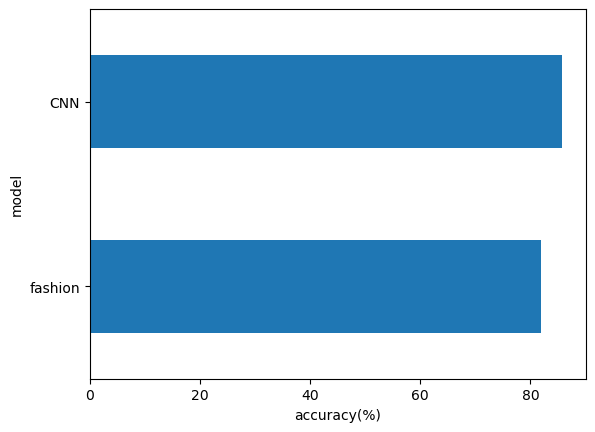

In [49]:
#visualize our model 
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy(%)")
plt.ylabel("model");

In [50]:
def make_predictions(model : torch.nn.Module,
                     data: list,
                     device : torch.device=device):
    pred_probs= []
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for sample in data:
            sample = torch.unsqueeze(sample , dim=0).to(device)
            pred_logit = model(sample)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)
            pred_probs.append(pred_prob.cpu())

    return torch.stack(pred_probs)

    

In [51]:
import random
random.seed(42)
test_samples = []
test_labels= []
for sample , label in random.sample(list(test_data),k=9):
    test_samples.append(sample)
    test_labels.append(label)
test_samples[0].shape


torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Sandal')

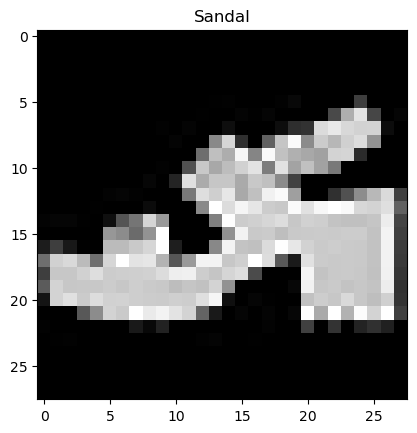

In [53]:
plt.imshow(test_samples[0].squeeze(),cmap="gray")
plt.title(class_name[test_labels[0]])

In [54]:
pred_probs = make_predictions(model=model_2,
                             data=test_samples)
pred_probs[:2]

tensor([[8.2417e-08, 5.7240e-09, 4.1906e-09, 2.4736e-09, 3.1512e-09, 9.9995e-01,
         5.2529e-06, 2.5576e-06, 4.1154e-07, 4.3859e-05],
        [1.9085e-02, 8.8522e-01, 1.0919e-04, 5.1773e-02, 6.9333e-03, 5.9415e-05,
         3.5530e-02, 4.6321e-04, 8.0028e-04, 2.4110e-05]])

In [55]:
# convert prediction problities to labels 
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 1, 7, 4, 3, 6, 4, 7, 1])

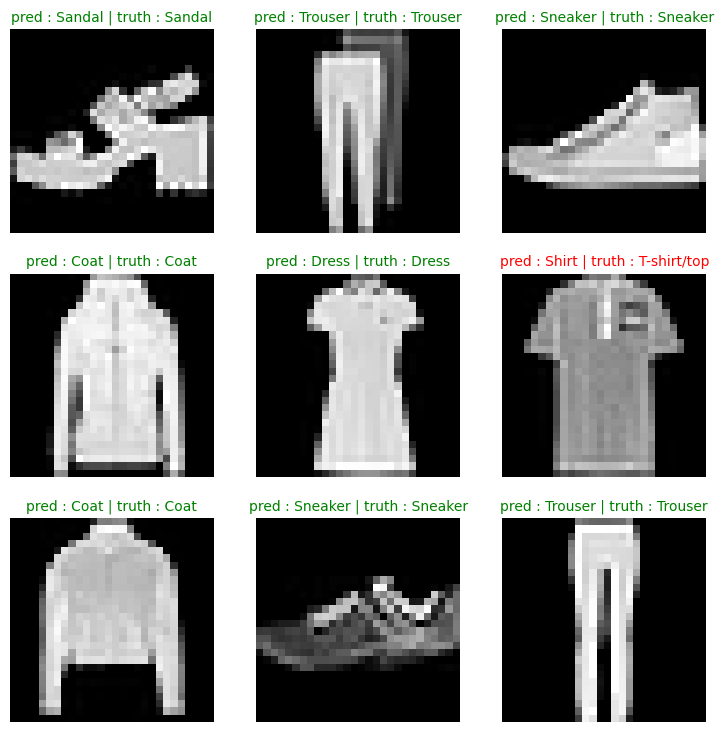

In [56]:
plt.figure(figsize=(9,9))
nrows = 3 
ncols = 3
for i , sample in enumerate(test_samples):
    plt.subplot(nrows,ncols,i+1)
    plt.imshow(sample.squeeze(),cmap="gray")
    pred_label = class_name[pred_classes[i]]
    truth_label= class_name[test_labels[i]]

    title_text = f"pred : {pred_label} | truth : {truth_label}"

    if pred_label == truth_label:
        plt.title(title_text,fontsize=10 , c = "g")
    else : 
        plt.title(title_text,fontsize=10,c="r")
    
    plt.axis(False)



In [57]:
### Confusion matrix 
from tqdm.auto import tqdm
# make prediction 
y_preds = []
model_2.eval()
with torch.inference_mode():
    for x , y in tqdm(test_dataloader, desc= "making prediction ..."):
        x,y = x.to(device) , y.to(device)
        y_logit = model_2(x)
        y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)
        y_preds.append(y_pred.cpu())

#concatenate list of predictions into tensor
# print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:10]


making prediction ...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1, 1, 6, 4, 4, 6, 5, 7])

In [58]:
len(y_pred_tensor)

10000

In [59]:
!pip install mlxtend

In [60]:
test_data.targets

tensor([9, 2, 1,  ..., 8, 1, 5])

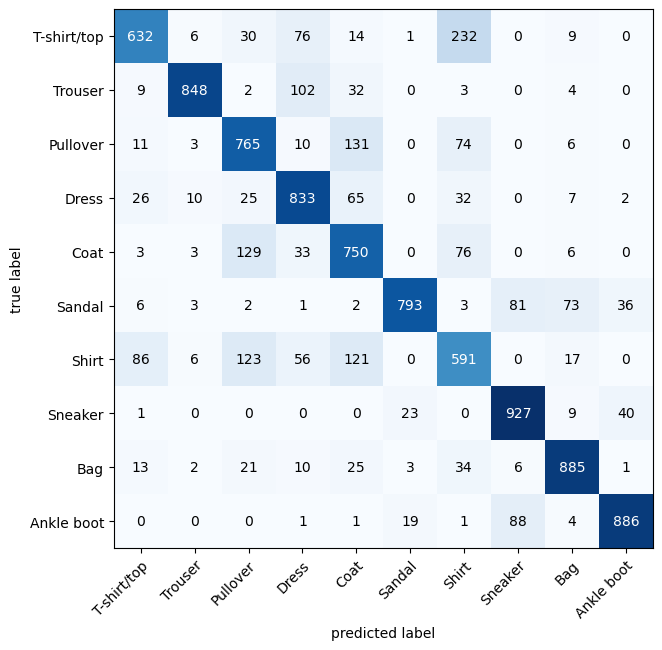

In [64]:
import torchmetrics
from torchmetrics import ConfusionMatrix
import mlxtend
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(task="multiclass" , num_classes=len(class_name))

confmat_tensor = confmat(preds = y_pred_tensor,
                         target = test_data.targets)
#plot 
fig,ax = plot_confusion_matrix(
    conf_mat= confmat_tensor.numpy(),
    class_names=class_name,
    figsize=(10,7)
)


In [63]:
confmat_tensor

tensor([[632,   6,  30,  76,  14,   1, 232,   0,   9,   0],
        [  9, 848,   2, 102,  32,   0,   3,   0,   4,   0],
        [ 11,   3, 765,  10, 131,   0,  74,   0,   6,   0],
        [ 26,  10,  25, 833,  65,   0,  32,   0,   7,   2],
        [  3,   3, 129,  33, 750,   0,  76,   0,   6,   0],
        [  6,   3,   2,   1,   2, 793,   3,  81,  73,  36],
        [ 86,   6, 123,  56, 121,   0, 591,   0,  17,   0],
        [  1,   0,   0,   0,   0,  23,   0, 927,   9,  40],
        [ 13,   2,  21,  10,  25,   3,  34,   6, 885,   1],
        [  0,   0,   0,   1,   1,  19,   1,  88,   4, 886]])

In [69]:
# save model 
from pathlib import Path
# create MODEL directory path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True,
                 exist_ok = True)

#create model save path 
MODEL_NAME = "Compute_vision_model"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

# sae model state dict 
print(f"saving model to : {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)


saving model to : models\Compute_vision_model


In [70]:
image.shape

torch.Size([1, 28, 28])

In [71]:
#create a new instance 
torch.manual_seed = 42
loaded_model_2 = CNN(input_shape=1,
                     hidden_units=10,
                     output_shape=len(class_name))
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
loaded_model_2.to(device)

C:\Users\hksystem\AppData\Local\Temp\ipykernel_11608\258194191.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PAT

CNN(
  (conv_block1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [72]:
model_2_results

{'model_name': 'CNN',
 'model_loss': 0.36846333742141724,
 'model_acc': 85.79273162939297}

In [73]:
#evaluate loaded model 
torch.manual_seed =42 
loaded_model_2_result = eval_model(model=model_2,
                                   data_loader=test_dataloader,
                                   loss_fn=loss_fn,
                                   accuracy_fn=accuracy_fn)
loaded_model_2_result

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'CNN',
 'model_loss': 0.36846333742141724,
 'model_acc': 85.79273162939297}

In [75]:
torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_result["model_loss"]),
              atol=1e-02)

tensor(True)